In [1]:
import re
import pandas as pd
import matplotlib.pyplot as pt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#Functions Definition

#extracting date/time
def datetime(s):
    pattern='^([0-9]+)(\/)([0-9]+)(\/)([0-9]+), ([0-9]+):([0-9]+ )[ ]?(AM|PM|am|pm)? -'
    result=re.match(pattern, s)
    if result:
        return True
    else:
        return False 

#Extraction of contact
def contact(s):
    s=s.split(":") #splits the text with every ':'
    if len(s)==2:
        return True
    else:
        return False
    
#Extraction of message
def message(line):
    split_line=line.split(' - ')
    date_time= split_line[0];
    dat, tim= date_time.split(', ')
    mssg=" ".join(split_line[1:])
    
    if contact(mssg):
        split_mssg=mssg.split(": ")
        contct=split_mssg[0]
        mssg=split_mssg[1]
    else:
        contct=None
    return dat, tim, contct, mssg

In [3]:
data=[]
convo='appa.txt'
with open(convo, encoding='utf-8') as f:
    f.readline()
    buffer=[]
    dat, tim, contct = None, None, None
    while True:
        line=f.readline()
        if not line:
            break
        line=line.strip()
        
        if datetime(line):
            if len(buffer)>0:
                data.append([dat, tim, contct, ''.join(buffer)])
            buffer.clear()
            dat, tim, contct, mssg = message(line)
            buffer.append(mssg)
        else:
            buffer.append(line)

In [4]:
#analysis of data
data_frame=pd.DataFrame(data,columns=["Date","Time","Contact","Message"])
#data_frame
data_frame['Date']=pd.to_datetime(data_frame['Date'])
data=data_frame.dropna()

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

import nltk
nltk.download('vader_lexicon')

#data

sentiments = SIA()
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Message"]]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Message"]]

data.head(2000)

/var/folders/d4/try2s8_123z5gsd43nhd7g540000gn/T/ipykernel_42455/586276200.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_frame['Date']=pd.to_datetime(data_frame['Date'])
[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>
/var/folders/d4/try2s8_123z5gsd43nhd7g540000gn/T/ipykernel_42455/586276200.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data["Message"]]
/var/folders/d4/try2s8_1

,Date,Time,Contact,Message,Positive,Negative,Neutral
0,2019-12-10,1:10 pm,Papa♥️,<Media omitted>,0.000,0.000,1.000
1,2019-10-19,5:25 pm,shubham.,Come at 7 15 7 30 only.,0.000,0.000,1.000
2,2019-10-19,8:15 pm,Papa♥️,When is your performance?,0.000,0.000,1.000
3,2019-10-19,8:15 pm,Papa♥️,Mami is not well so got to wind up soon from A...,0.000,0.122,0.878
4,2019-10-19,8:15 pm,Papa♥️,Make sure you come with us as soon as you comp...,0.161,0.000,0.839
...,...,...,...,...,...,...,...
351,2022-10-22,8:11 pm,shubham.,Why?,0.000,0.000,1.000
352,2022-10-22,8:11 pm,Papa♥️,Ok,1.000,0.000,0.000
353,2022-10-22,8:12 pm,Papa♥️,Just checking whether on time,0.000,0.000,1.000
354,2022-10-22,8:12 pm,Papa♥️,<Media omitted>,0.000,0.000,1.000


In [5]:
#sum of each negative/positive/neutral

'''x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])
a=0 #pos
b=0 #neg
c=0 #neu
for row in range(len(data)):
    if(x>y and x>z):
        a+=1
    elif(y>x and y>z):
        b+=1
    else:
        c+=1
print(a,b,c)'''

'x=sum(data["Positive"])\ny=sum(data["Negative"])\nz=sum(data["Neutral"])\na=0 #pos\nb=0 #neg\nc=0 #neu\nfor row in range(len(data)):\n    if(x>y and x>z):\n        a+=1\n    elif(y>x and y>z):\n        b+=1\n    else:\n        c+=1\nprint(a,b,c)'

In [6]:
#checking whether the chat is pos, neg or neut.
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])
print("Positive Score: %d" %x)
print("Negative Score: %d" %y)
print("Neutral Score: %d" %z)
def score(x,y,z):
    if(x>y and x>z):
        print("Sentiment is Positive")
    elif(y>x and y>z):
        print("Sentiment is Negative")
    else:
        print("Sentiment is Neutral")

'''def file():
    f=open("data.txt",'w')
    for row in data_frame:
        f.writeline(row)
    print(f)
    f.close()'''

score(x,y,z)
#file()

Positive Score: 22
Negative Score: 21
Neutral Score: 278
Sentiment is Neutral


In [7]:
#print(data_frame.Message.unique())
#print(data_frame.Contact.unique())
#print(data_frame.Time.unique())

There are 15557 words totally.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


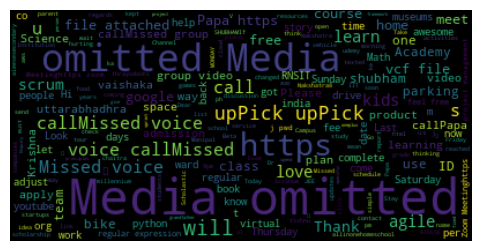

In [9]:
text=" "
for i in data_frame.Message:
    text+=i

#text=" ".join(i for i in data_frame.Message)
print ("There are {} words totally.".format(len(text)))

import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')
new_words=(' Media', 'Media ', ' Media', 'omitted', 'omitted ', ' omitted', 'Media omitted', 'omitted Media ', 'Media Omitted ', ' Media Omitted', ' Omitted Media', ' Media Omitted ', ' Omitted Media ')
for i in new_words:
    stopwords.append(i)
print(stopwords)
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
# Display the generated image:
pt.figure( figsize=(9,3))
pt.imshow(wordcloud, interpolation='bilinear')
pt.axis("off")
pt.show()